BASE MNIST Reconnaissance de chiffres

La base est formées de 60 000 données d'apprentissage et de 10 000 données de test.
chaque données est de la forme: [ une image, et le chiffre attendu].
Chaque image est de la taille 28x28 pixels et chaque pixel contient 256 niveaux de gris ( 0 à 255)

Pour acceder à ces données:


In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


train_images[1] correspond à une image et 
train_labels[1] au chiffre ou label attendu pour cette image.

Avant de commencer ne pas oublier d'installer la bibliotheque qui gere l'affichage.

In [ ]:
import matplotlib.pyplot as plt

Si l'on souhaite afficher une image à l'aide de matplotlib, utilisons la commande suivante en indiquant le numéro d'ordre de l'image.

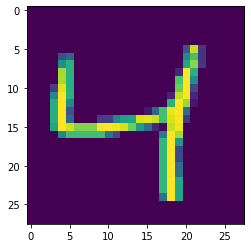

In [ ]:
plt.imshow(train_images[2]) # en couleur
plt.show()

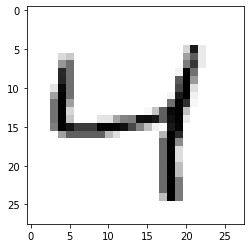

In [ ]:
plt.imshow(train_images[2], cmap = 'Greys') # en noir et blanc
plt.show()

Traitement des données

Le programme complet


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


Vérifions si nous avons bien 60 000 données d'apprentissage:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

voici les données de test

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
test_labels[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

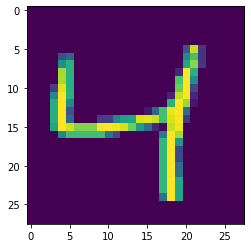

In [ ]:
plt.imshow(train_images[2]) # en couleur
plt.show()

Architecture du réseau

In [ ]:
from keras import models
from keras import layers

In [ ]:
import argparse
import requests
import time
import os

In [ ]:
network=models.Sequential()
network.add(layers.Dense(512,activation='relu',
                         input_shape=(28*28,))) # 28*28=784
network.add(layers.Dense(10,activation='softmax'))

*********************************************************************


## 5.1 - Introduction aux réseaux virtuels ConvNet

Ce bloc-notes contient l'exemple de code trouvé dans le chapitre 5, section 1 de Deep Learning with Python . Notez que le texte original comporte beaucoup plus de contenu, en particulier des explications et des chiffres supplémentaires : dans ce cahier, vous ne trouverez que le code source et les commentaires associés.

Tout d'abord, examinons concrètement un exemple de convnet très simple. Nous utiliserons notre convnet pour classer les chiffres MNIST, une tâche que vous avez déjà effectuée au chapitre 2, en utilisant un réseau densément connecté (la précision de notre test était alors de 97,8 %). Même si notre convnet sera très basique, son la précision fera toujours exploser celle du modèle densément connecté du chapitre 2.

Les 6 lignes de code ci-dessous vous montrent à quoi ressemble un convnet de base. C'est une pile de Conv2Det MaxPooling2Dcouches. Nous verrons dans un minute ce qu'ils font concrètement. Fait important, un convnet prend en entrée des tenseurs de forme (image_height, image_width, image_channels)(sans compter la dimension du lot). Dans notre cas, nous allons configurer notre convnet pour traiter les entrées de taille (28, 28, 1), qui est le format des images MNIST. Nous le faisons via passer l'argument input_shape=(28, 28, 1)à notre première couche.


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Montrons l'architecture de notre convnet jusqu'à présent : 

Compiltion du modele

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

ous pouvez voir ci-dessus que la sortie de chaque Conv2Det MaxPooling2Dla couche est un tenseur 3D de forme (height, width, channels). La largeur et les dimensions en hauteur ont tendance à diminuer à mesure que nous progressons dans le réseau. Le nombre de canaux est contrôlé par le premier argument passé à la Conv2Dcouches (par exemple 32 ou 64).

La prochaine étape serait d'alimenter notre dernier tenseur de sortie (de forme (3, 3, 64)) dans un réseau de classificateurs densément connecté comme ceux que vous êtes déjà familier avec : une pile de Densecouches. Ces classificateurs traitent des vecteurs, qui sont 1D, alors que notre sortie actuelle est un tenseur 3D. Donc, d'abord, nous devrons aplatir nos sorties 3D en 1D, puis ajouter quelques Densecouches sur le dessus :



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


Nous allons faire une classification à 10 voies, nous utilisons donc une couche finale avec 10 sorties et une activation softmax. Voici maintenant ce que notre réseau ressemble à:

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0



Comme vous pouvez le voir, notre (3, 3, 64)les sorties ont été aplaties en vecteurs de forme (576,), avant de passer par deux Densecouches.

Maintenant, formons notre convnet sur les chiffres MNIST. Nous allons réutiliser une grande partie du code que nous avons déjà couvert dans l'exemple MNIST du chapitre 2.


In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 20s 10ms/step - loss: 0.1743 - accuracy: 0.9459
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0319 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0183 - accuracy: 0.9948


Évaluons le modèle sur les données de test : 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0289 - accuracy: 0.9920


In [ ]:
test_acc

0.9919999837875366

exactitude de test à 99%

--------------------------------------------------------------------

In [ ]:
from keras.backend import categorical_crossentropy
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Préparation des données d'images:**
Nous devons tranformer nos images 28x28 en un vecteur de taille 784 ( 28x28 = 784)


In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [ ]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

Préparation des étiquettes

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from matplotlib import test
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

Entrainement du  réseau

In [ ]:
network.fit(train_images, train_labels, epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2590 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1034 - accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0489 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0363 - accuracy: 0.9890


nous avons 2 informations : loss: la perte du réseau et accuracy l'exactitude de la prédiction

In [ ]:
test_loss,test_acc=network.evaluate(train_images,train_labels)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229 - accuracy: 0.9937


In [ ]:
print('test_acc:',test_acc)  # exactitude de précision

test_acc: 0.9937333464622498


In [ ]:
print('test_loss:',test_loss) # pertes du reseau

test_loss: 0.02291114069521427


In [ ]:
y_predict=network.predict(test_images)

In [ ]:
chiffre_predit=np.argmax(y_predict[2])

In [ ]:
print('sortie reseau',y_predict[2])

sortie reseau [2.7676089e-07 9.9629813e-01 7.8491314e-04 5.8247992e-05 1.5133542e-04
 2.4815032e-05 1.1380592e-05 1.8827587e-03 7.8328111e-04 5.0163248e-06]


In [ ]:
print('chiffre attendu:',test_images[2])

chiffre attendu: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.   

Maintenant on transforme chaque données d'apprentissage Y en une liste de longueur 10 soit [0,0,0,0,1,0,0,0,0,0]
avec, ar exemple le 1 positionné sur le chiffre attendu.
Ici le 1 est en position 4


Préparation des données de test:


In [ ]:
model=Sequential()

In [ ]:

# première couche de neurones:
model.add(Dense(8,input_dim=784, activation='sigmoid'))
# Deuxième couche de neurones:
model.add(Dense(8,activation='sigmoid'))
# couche de sortie : 10 neurones soit un par chiffre
model.add(Dense(10,activation='softmax'))


**Methode de descente de gradient:**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=40)


NameError: ignored

**Résultats:**

In [ ]:
from tensorflow.python.keras.metrics import accuracy
resultat = model.evaluate(X_test, Y_test, verbose=0)
print('Valeur de l''erreur sur les données de test (loss):', resultat[0])
print('Précision sur les données de test (accuracy):',resultat[1])


Valeur de lerreur sur les données de test (loss): 0.38443323969841003
Précision sur les données de test (accuracy): 0.8935999870300293


**Prédiction sur les données de test:**

Ci dessous les 10 premieres images de données de test

In [ ]:
Y_test_data[:10] # les 10 premiers chiffres des données de test

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
# à partir des 10 premiers chiffres des données de test [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
# nous allons prendre le chiffre 0 qui occupe la position 3

i=3

In [ ]:
chiffre_predict=np.argmax(Y_predict[i])


In [ ]:
print("Sortie reseau",Y_predict[i])
print("Chiffre attendu :",Y_test_data[i])
print("Chiffre prédit:", chiffre_predict)


Sortie reseau [9.4580323e-01 1.8958203e-06 1.3776140e-02 1.3493339e-03 5.9852548e-05
 2.9116353e-02 7.1715643e-03 2.2372113e-05 2.6538635e-03 4.5437122e-05]
Chiffre attendu : 0
Chiffre prédit: 0


Si l'on souhaite afficher une image des données d'apprentissage à l'aide de matplotlib, utilisons la commande suivante en indiquant le numéro d'ordre de l'image.

TypeError: ignored

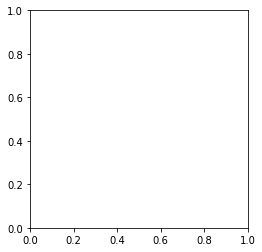

In [ ]:
plt.imshow(train_images[2]) # en couleur
plt.show()

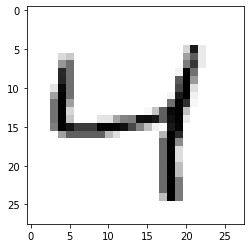

In [ ]:
plt.imshow(X_train_data[2], cmap = 'Greys') # en noir et blanc
plt.show()

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)




5.1 - Introduction aux réseaux virtuels

Ce bloc-notes contient l'exemple de code trouvé dans le chapitre 5, section 1 de Deep Learning with Python . Notez que le texte original comporte beaucoup plus de contenu, en particulier des explications et des chiffres supplémentaires : dans ce cahier, vous ne trouverez que le code source et les commentaires associés.

Tout d'abord, examinons concrètement un exemple de convnet très simple. Nous utiliserons notre convnet pour classer les chiffres MNIST, une tâche que vous avez déjà effectuée au chapitre 2, en utilisant un réseau densément connecté (la précision de notre test était alors de 97,8 %). Même si notre convnet sera très basique, son la précision fera toujours exploser celle du modèle densément connecté du chapitre 2.

Les 6 lignes de code ci-dessous vous montrent à quoi ressemble un convnet de base. C'est une pile de Conv2Det MaxPooling2Dcouches. Nous verrons dans un minute ce qu'ils font concrètement. Fait important, un convnet prend en entrée des tenseurs de forme (image_height, image_width, image_channels)(sans compter la dimension du lot). Dans notre cas, nous allons configurer notre convnet pour traiter les entrées de taille (28, 28, 1), qui est le format des images MNIST. Nous le faisons via passer l'argument input_shape=(28, 28, 1)à notre première couche.


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


Montrons l'architecture de notre convnet jusqu'à présent : 

In [ ]:
model.summary()




Vous pouvez voir ci-dessus que la sortie de chaque Conv2Det MaxPooling2Dla couche est un tenseur 3D de forme (height, width, channels). La largeur et les dimensions en hauteur ont tendance à diminuer à mesure que nous progressons dans le réseau. Le nombre de canaux est contrôlé par le premier argument passé à la Conv2Dcouches (par exemple 32 ou 64).

La prochaine étape serait d'alimenter notre dernier tenseur de sortie (de forme (3, 3, 64)) dans un réseau de classificateurs densément connecté comme ceux que vous êtes déjà familier avec : une pile de Densecouches. Ces classificateurs traitent des vecteurs, qui sont 1D, alors que notre sortie actuelle est un tenseur 3D. Donc, d'abord, nous devrons aplatir nos sorties 3D en 1D, puis ajouter quelques Densecouches sur le dessus :


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Nous allons faire une classification à 10 voies, nous utilisons donc une couche finale avec 10 sorties et une activation softmax. Voici maintenant ce que notre réseau ressemble à: 

In [ ]:


model.summary()





Comme vous pouvez le voir, notre (3, 3, 64)les sorties ont été aplaties en vecteurs de forme (576,), avant de passer par deux Densecouches.

Maintenant, formons notre convnet sur les chiffres MNIST. Nous allons réutiliser une grande partie du code que nous avons déjà couvert dans l'exemple MNIST du chapitre 2.


In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
